#HeapSort

##1. Descripción del Problema
Dentro del problema de ordenamiento de datos existen no sólo distintas soluciones, sino también paradigmas de resolución para abarcar. El paradigma "Divide y vencerás" puede ser muy útil y eficiente, como lo demuestran los algoritmos QuickSort y MergeSort, pero a raíz de la eficiencia teórica de este paradigma nace la interrogante: ¿Existe un método distinto para encontrar una solución eficiente al problema del ordenamiento?.

Para que un algoritmo pueda poseer una eficiencia igual o similar a las soluciones que ocupan el paradigma "Divide y vencerás", debe conseguir que una entrada de datos de tamaño $n$ se organice en un tiempo de ejecución promedio de $O(n*log(n))$.

---

#### **Entradas y Salidas:**

**Entrada**: Secuencia de n números en un arreglo. Ejemplo: $[n_1,n_2,...,n_m]$

**Salida**: Serie de números ordenada en base de los datos de entrada. Por lo que si la salida es un arreglo $[n_1',n_2',...,n_m']$, se cumple que $n_1'\leq n_2' \leq... \leq n_m'$ o $n_1'\ge n_2' \ge... \ge n_m'$.


## 2. Descripción del Algoritmo

El algortimo HeapSort es un método de ordenamiento que permite hallar una solución eficiente al problema anteriormente definido. Esta solución en particular, se caracteriza por hacer uso de un $heap$ (como lo dice su nombre) o montículo para reorganizar los elementos de un arreglo de $n$ números, de modo que sus operaciones están fuertemente ligadas a las funciones y naturaleza del montículo como estructura de datos. Eso sí, al transformar a un $heap$ el arreglo en función de organizar los datos, no necesita de una estructura auxiliar. 

---
###¿Cómo funciona un $heap$?

Es importante entender la distribución de los elementos en un $heap$, puesto a que el arreglo reorganizarse de forma correcta para convertirse en un montículo. Un monticulo es una estructura de datos que visualmente funciona como un árbol, es decir, tiene un nodo raíz que posee 2 hijos y estos hijos poseen hasta 2 hijos a su vez, tal y como se ve en la siguiente figura:

Sin embargo, a diferencia de otros árboles conocidos, un $heap$ sólo necesita que los 2 hijos de un nodo padre tengan un valor menor (o mayor según el tipo de montículo).

Para representar en la lógica del código un montículo se suele usar un arreglo que almacena los elementos, eso sí, los almacena según la relación nodo-padre y nodo-hijo que exista, siendo así posible que se establezca una relación matemática para encontrar a los hijos o al padre si se conoce la posición de alguno:

- Los nodos hijos estarán siempre en la posición $2i+1$ y $2i+2$ del arreglo. $i$ es la posición del padre.
- El nodo padre siempre estará en la posición $(k-1)/2$ del arreglo. $k$ es la posición de uno de los hijos.

La siguiente ilustración muestra un montículo en su forma de árbol y su representación en un arreglo:

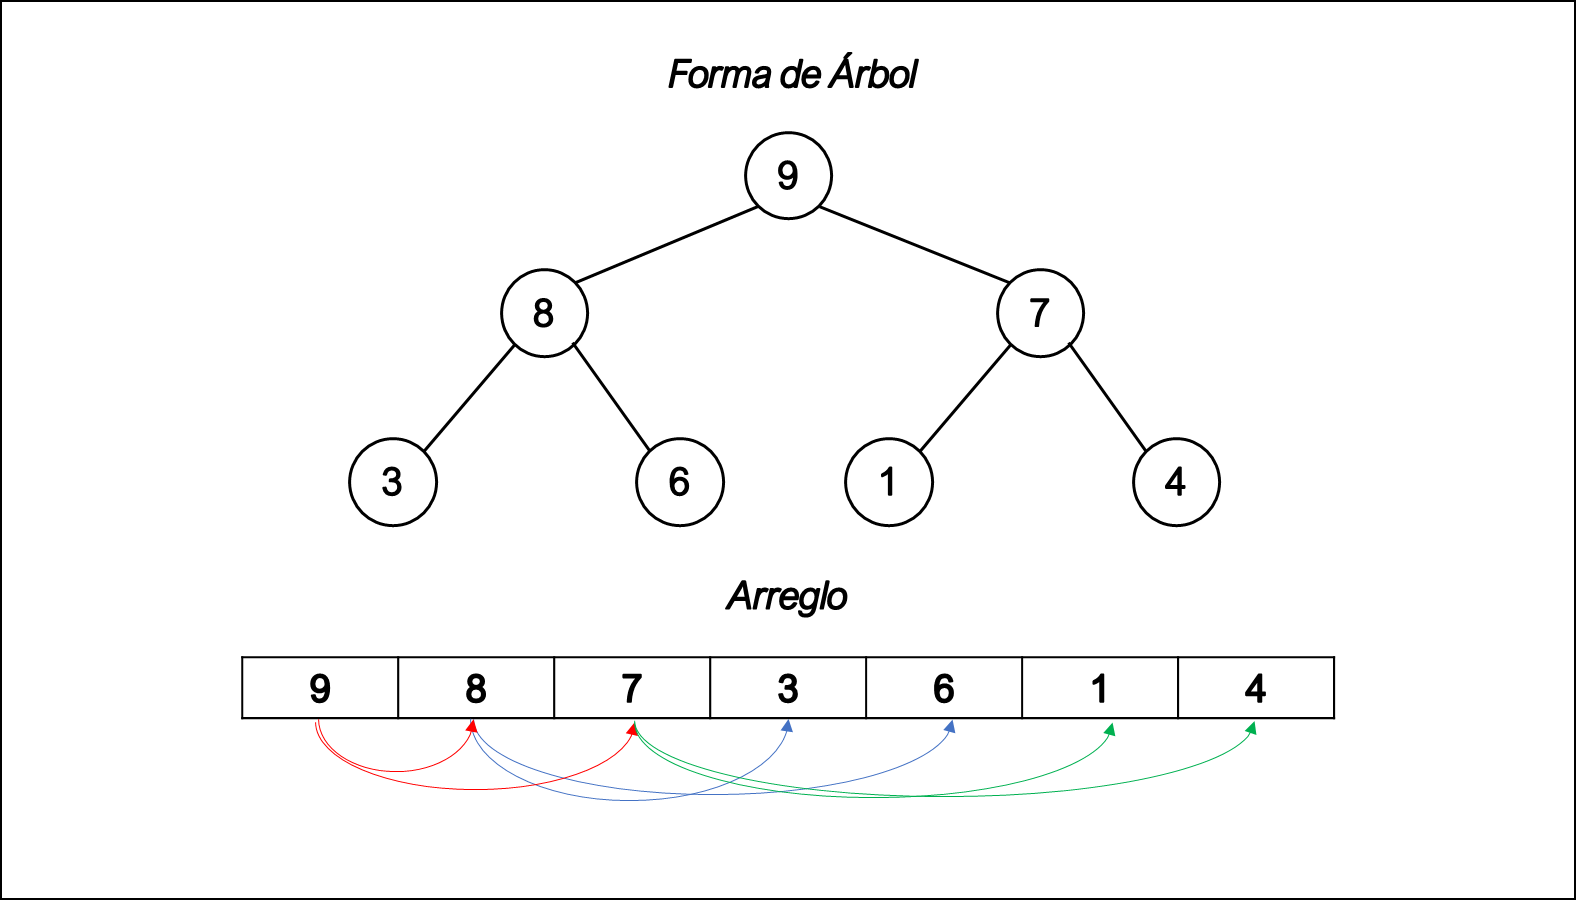

In [13]:
#@title
Image('Heap1.png', width = 500)



En el caso de esta implementación, se utilizará un **Max-Heap**, el cual tendrá al elemento más grande (mayor) como raíz y los nodos hijos serán siempre de menor valor. 

---

###¿Cómo se va construyendo un $Heap$?

Como se mencionó anteriormente, para construir un montículo deben reorganizarse los elementos del arreglo de entrada. Del proceso de reordenamiento de un dato se encarga una función llamada **Heapify**, esta tomará un elemento de la secuencia y verificará que cumpla con la propiedad de todo montículo (que el número seleccionado sea mayor a los elementos que serían sus nodos hijos). De no ser así, la función se encargará de "sumergirlo" (intercambiarlo con el mayor de sus hijos) hasta que encuentre un lugar en el arreglo que permita que cumpla con la propiedad del $heap$. A continuación se muestra un ejemplo de como funciona la operación **Heapify**:

1. Arreglo $A$ de $n$ elementos y Montículo correspondiente:

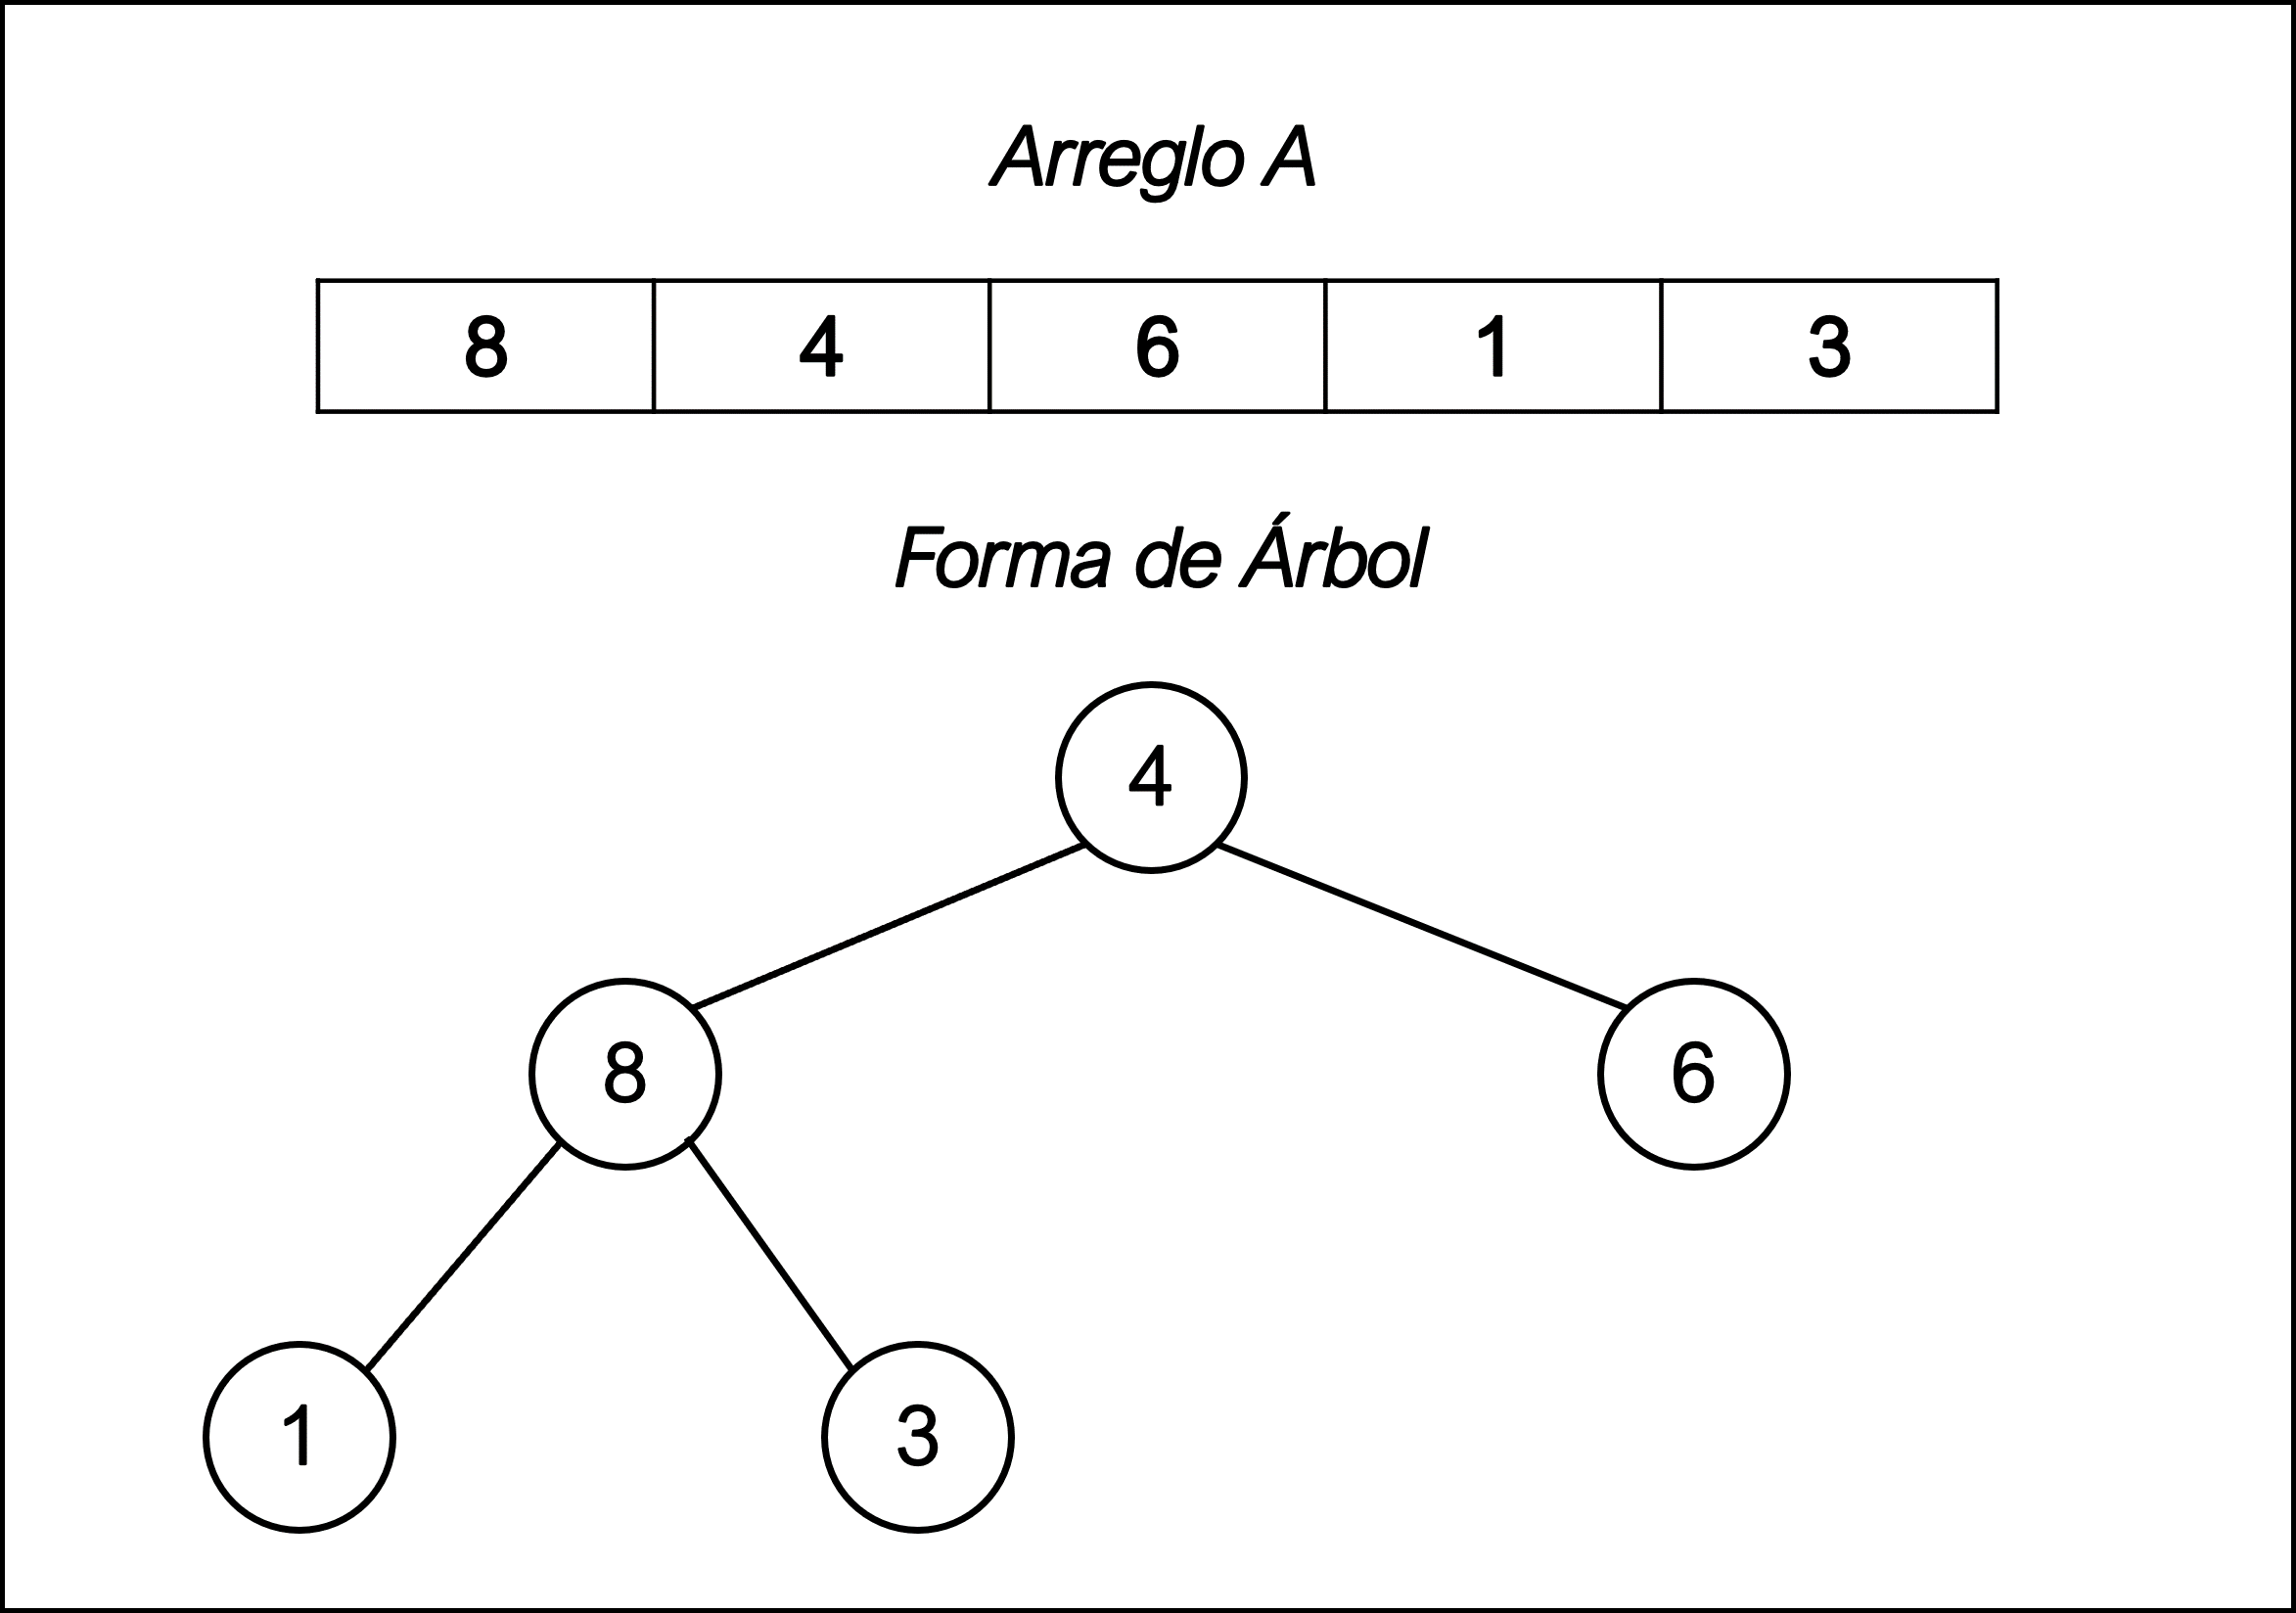

In [19]:
#@title
Image('Heap2.png', width = 400)

2. Heapify actúa en el nodo raíz $elem$, por lo que compara su valor con el de sus 2 hijos:

3. Cómo el valor de hijo izquierdo es el mayor entre los 3, cuando debería ser la raíz el mayor, **Heapify** intercambia estos valores:

4. Ahora **Heapify** vuelve a comparar a $elem$ con sus nuevos hijos, pero como $elem$ cumple con la propiedad, no resulta necesario intercambiar posiciones y la función acaba. 

Como es posible observar, **Heapify** busca transformar una secuencia para que siempre mantenga la propiedad del $heap$, pero como no siempre se utilizará sólo un intercambio, esta función es recursiva. A continuación se presenta un ejemplo de código para **Heapify**.

In [20]:
#Heapify:
def heapify(A, n, root):
    #Calcular índices
    largeNum = root #Nodo raíz
    leftSon = 2 * root + 1 #Hijo Izquierdo
    rightSon = 2 * root + 2 #Hijo Derecho

    #Comprobar que existe un hijo izquierdo, si lo hay, compararlo con el padre
    if leftSon < n and A[largeNum] < A[leftSon]:
        #Si el hijo es mayor que el padre, asignar al hijo como el mayor
        largeNum = leftSon
    
    #Comprobar que existe un hijo derecho, si lo hay, compararlo con el padre
    if rightSon < n and A[largeNum] < A[rightSon]:
        #Si el hijo es mayor que el padre, asignar al hijo como el mayor
        largeNum = rightSon

    # Si la raíz o padre no es el número mayor, intercambiar con el mayor
    if largeNum != root:
        A[root], A[largeNum] = A[largeNum], A[root] #Swap
        heapify(A, n, largeNum) #Continuar iterando

---

###Función Build-Heap:

Continuando con la línea anterior, si bien **Heapify** es la función que se encarga de reubicar los elementos de un arreglo, esta operación es dirigida por otra función que le indica en que posición del arreglo debe iniciar este proceso. Aquella es la función **Build-Heap**, cuya utilidad es la de recorrer hacia atrás el arreglo, evitando que **Heapify** opere sobre nodos hoja, para que esta sólo funcione la cantidad de veces necesaria para armar un montículo correcto. El siguiente ejemplo demuestra como funcionan **Build-Heap** y **Heapify** juntos:

1. **Build-Heap** recibe un arreglo $A$ desordenado de $n$ elementos:

2. **Build-Heap** se encarga de que **Heapify** no opere en nodos hoja, ya que no es posible hacer las comparaciones propias de **Heapify**, de ese modo, **Build-Heap** le ordena a **Heapify** comenzar desde el primer nodo padre que encuentra recorrendiendo hacia atrás (derecha a izquierda) el arreglo:

3. **Heapify** comienza a iterar e intercambia los nodos necesarios:

4. Cuando se llega al límite, **Build-Heap** detiene las iteraciones de **Heapify** y entra el montículo hecho.

**Heapify** debe comenzar a iterar cuando no hayan nodos hoja, para calcular esto, simplemente hay que comenzar desde la mitad del arreglo, ya que los elementos que están a la derecha del elemento medio siempre serán nodos hoja. Tomando en cuenta lo anterior, es posible definir en código a la función **Build-Heap** de la siguiente forma:

In [40]:
#Función Build-Heap:
def buildHeap(A):
  #Ciclo de llamados a Heapify
  for i in range(n//2, -1, -1):
      heapify(A, n, i)

---

###¿Cómo opera HeapSort?:

Sabiendo como operan las funciones específicas que ayudan al método de ordenamiento, es posible definir como opera HeapSort. 

**Pasos a Seguir:**

El algoritmo utiliza ambas funciones anteriores para manejar los elementos.
Tómese el caso de un arreglo $A$ desordenado con $n$ elementos.

1. En primer lugar, HeapSort llama a **Build-Heap** para transformar la secuencia de datos en un $heap$. 

2. Luego, el algoritmo tomará el último nodo hoja (también último elemento del arreglo) y lo intercambiará con el nodo raíz, dejando al elemento de mayor valor de la secuencia en la posición n-1.

3. Se disminuye en 1 el tamaño del arreglo/montículo, evitando que las operaciones actúen en el número que ya encontró su posición correcta en la secuencia.

4. HeapSort llama a **Heapify** para que "sumerga" al nodo raíz que quedó producto del "swap" anterior.

5. Se repite el proceso hasta que los $n$ elementos estén ordenados.

De esta forma, es que HeapSort termina ordenando un arreglo que finalmente es retornado.

---

### Ejemplo de Ejecución:

Por lo que a continuación, se mostrará un ejemplo corto de implementación de HeapSort:

1. HeapSort recibe un arreglo $A$ desordenado como ejemplo:

        A = [3,7,8,2,6]                3
                                      / \
                                     7   8
                                    / \
                                   2   6 

2. El algoritmo llama a la función **Build-Heap** para que construya un montículo con los elementos del arreglo:

  - Build-Heap: Itera posición 1 para Heapify -> valor = 7.

          A = [3,7,8,2,6]              3
                                      / \
          n = 5                     *7*   8
                                    / \
                                   2   6

          Propiedad: (7 > 2) True        --> Cumple con la propiedad.
                     (7 > 6) True

  - Build-Heap: Itera posición 0 para Heapify -> valor = 3.

          A = [3,7,8,2,6]             *3*
                                      / \
          n = 5                      7   8
                                    / \
                                   2   6

          Propiedad: (3 > 7) False        --> NO cumple con la propiedad.
                     (3 > 8) False

   - Heapify: Intercambia el valor = 3 con el hijo mayor (8). Luego compara nuevamente.
          
          A = [8,7,3,2,6]             *8*
                                      / \
          n = 5                      7   3
                                    / \
                                   2   6

          Propiedad: (8 > 7) True        --> Cumple con la propiedad.
                     (8 > 3) True        --> Fin de iteraciones.

3. Con el montículo ya hecho, HeapSort comenzará a iterar en un ciclo para realizar intercambios y encontrar los elementos mayores:

  - Primera iteración: Intercambio entre $A[0]$ y $A[4]$.

          --------------------------------------------------------------------
          A = [6,7,3,2,8]             *6*               A' = [6,7,3,2,8]
                                      / \
          n = 5                      7   3
                                    / \
                                   2   8
          --------------------------------------------------------------------
  Se "remueve" el último elemento del montículo/arreglo y se llama a Heapify en el nodo raíz.

          --------------------------------------------------------------------
          A = [6,7,3,2]               *6*               A' = [6,7,3,2,8]
                                      / \
          n = 4                      7   3
                                    / 
                                   2   

          Propiedad: (6 > 7) False       --> NO cumple con la propiedad.
                     (6 > 3) True        --> 6 y 7 se intercambian.

         ---> 2° llamado a Heapify.

          A = [7,6,3,2]               *7*               A' = [7,6,3,2,8]
                                      / \
          n = 4                      6   3
                                    / 
                                   2   

          Propiedad: (7 > 6) True       --> Cumple con la propiedad.
                     (7 > 3) True       --> Fin de iteración.
          --------------------------------------------------------------------

  - Segunda iteración: Intercambio entre $A[0]$ y $A[3]$.

          --------------------------------------------------------------------
          A = [2,6,3,7]               *2*               A' = [2,6,3,7,8]
                                      / \
          n = 4                      6   3
                                    / 
                                   7   
          --------------------------------------------------------------------
  Se "remueve" el último elemento del montículo/arreglo tamaño $n=4$ y se llama a Heapify para el nodo raíz $A[0]$.

          --------------------------------------------------------------------
          A = [2,6,3]                 *2*               A' = [2,6,3,7,8]
                                      / \
          n = 3                      6   3  

          Propiedad: (2 > 6) False       --> NO cumple con la propiedad.
                     (2 > 3) False       --> 2 y 6 se intercambian.

         ---> 2° llamado a Heapify.

          A = [6,2,3]                 *6*               A' = [6,2,3,7,8]
                                      / \
          n = 3                      2   3  

          Propiedad: (6 > 2) True       --> Cumple con la propiedad.
                     (6 > 3) True       --> Fin de Iteración.

          --------------------------------------------------------------------
    
  - Tercera iteración: Intercambio entre $A[0]$ y $A[2]$.

          --------------------------------------------------------------------
          A = [3,2,6]                 *3*               A' = [3,2,6,7,8]
                                      / \
          n = 3                      2   6  
          --------------------------------------------------------------------
  Se "remueve" el último elemento del montículo/arreglo tamaño $n=3$ y se llama a Heapify para el nodo raíz $A[0]$.

          --------------------------------------------------------------------
          A = [3,2]                   *3*               A' = [3,2,6,7,8]
                                      / 
          n = 2                      2     

          Propiedad: (3 > 2) True       --> Cumple con la propiedad.
                                         --> Fin de Iteración.
          --------------------------------------------------------------------
  - Cuarta iteración: Intercambio entre $A[0]$ y $A[1]$.

          --------------------------------------------------------------------
          A = [2,3]                   *2*               A' = [2,3,6,7,8]
                                      / 
          n = 2                      3     
          --------------------------------------------------------------------
  Se "remueve" el último elemento del montículo/arreglo tamaño $n=2$ y se llama a Heapify para el nodo raíz $A[0]$.

          --------------------------------------------------------------------
          A = [2]                     *2*               A' = [2,3,6,7,8]
          n = 1                          

          Propiedad: NO TIENE HIJOS      --> Cumple con la propiedad.
                                         --> Fin de Iteración.
          --------------------------------------------------------------------
  
  4. Al salir del "loop", el arreglo ya tendrá sus elementos ordenados, por lo que sólo queda retornar.

##3. Implementación del algortimo.

A continuación se presenta un ejemplo de código para programar el algortimo HeapSort:

In [38]:
def heapSort (A):
      #Calcular largo n del arreglo
      n = len(A)
  
      #Construir el Arreglo con Build-Heap
      for i in range(n//2, -1, -1):
          heapify(A, n, i)
  
      for i in range(n-1, 0, -1):
          #Intercambiar el nodo raíz con el último
          A[i], A[0] = A[0], A[i]
          #Llamar a Heapify para el nuevo nodo raíz
          heapify(A, i, 0)
  
""""""""""""""""""""""""""""""""""""""""""""""""""""""
#Función que imprime la lista de datos.
def arrayPrinter(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
    print("=======================================")

""""""""""""""""""""""""""""""""""""""""""""""""""""""
#Ejemplo:
print("=======================================")
data = [8,3,6,7,9,1,4]
print("Arreglo de Entrada:")
arrayPrinter(data)
heapSort(data)
print("Arreglo de Salida:")
arrayPrinter(data)
  

Arreglo de Entrada:
8 3 6 7 9 1 4 
Arreglo de Salida:
1 3 4 6 7 8 9 


Ahora se mostrará una versión con `Verbose = True`, para mejor entendimiento del proceso:

In [106]:
#Heapify:
def heapify(A, n, root, iterator, verbose):
    #Opción verbose:
    if verbose == True:
      print(f"Iteración {iterator}: {str(A)}")
    
    #Calcular índices
    largeNum = root #Nodo raíz
    leftSon = 2 * root + 1 #Hijo Izquierdo
    rightSon = 2 * root + 2 #Hijo Derecho

    #Comprobar que existe un hijo izquierdo, si lo hay, compararlo con el padre
    if leftSon < n and A[largeNum] < A[leftSon]:
        #Si el hijo es mayor que el padre, asignar al hijo como el mayor
        largeNum = leftSon
    
    #Comprobar que existe un hijo derecho, si lo hay, compararlo con el padre
    if rightSon < n and A[largeNum] < A[rightSon]:
        #Si el hijo es mayor que el padre, asignar al hijo como el mayor
        largeNum = rightSon

    # Si la raíz o padre no es el número mayor, intercambiar con el mayor
    if largeNum != root:
        #Opción verbose:
        if verbose == True:
          print(f"¡A[{root}] no cumple con la propiedad!")
          print(f"Swap: A[{root}] = {A[root]} <----> A[{largeNum}] = {A[largeNum]}")
          print("----------------------------------")
        A[root], A[largeNum] = A[largeNum], A[root] #Swap
        iterator += 1
        heapify(A, n, largeNum, iterator, verbose) #Continuar iterando

#Función Build-Heap:
def buildHeap(A, verbose):
  #Ciclo de llamados a Heapify
  for i in range(n//2-1, -1, -1):
    if verbose == True:
      print("==================================")
      print(f"Heapify en A[{i}] = {A[i]}:")
      print("----------------------------------")
    heapify(A, n, i, 1, verbose)

def heapSort (A, verbose):
      #Calcular largo n del arreglo
      n = len(A)

      #Opción Verbose:
      if verbose == True:
        print("\n¡Inicio Función Build-Heap!\n")

      #Construir el Arreglo con Build-Heap
      buildHeap(A, verbose)

      #Opción Verbose:
      if verbose == True:
        print("==================================\n")
        print("¡Fin Función Build-Heap!")
        print("\n==================================\n")
        print("¡HeapSort comienza a ordenar el arreglo!\n")

      for i in range(n-1, 0, -1):
        #Opción Verbose:
        if verbose == True:
          print("==================================")
          print(f"Swap: A[{0}] = {A[0]} <----> A[{i}] = {A[i]}")

        #Intercambiar el nodo raíz con el último
        A[i], A[0] = A[0], A[i]

        #Opción verbose:
        if verbose == True:
          print(f"¡A[{i}] = {A[i]} está en su posición!")

        #Opción verbose:
        if (verbose == True):
          print("==================================")
          print(f"Heapify en A[{0}] = {A[0]}:")
          print(f"Arreglo: {A}")

        #Llamar a Heapify para el nuevo nodo raíz
        if (verbose == True):
          print("----------------------------------")
        heapify(A, i, 0, 1, verbose)
        if (verbose == True):
          print("¡Fin de iteración!")
  
""""""""""""""""""""""""""""""""""""""""""""""""""""""
#Función que imprime la lista de datos.
def arrayPrinter(A):
    for i in range(len(A)):
        print(A[i], end=" ")
    print()
    print("=======================================")

""""""""""""""""""""""""""""""""""""""""""""""""""""""
#Ejemplo:
print("=======================================")
data = [8,3,6,7,9,1,4]
print("Arreglo de Entrada:")
arrayPrinter(data)
heapSort(data, True)
print("=======================================")
print("Arreglo de Salida:")
arrayPrinter(data)

Arreglo de Entrada:
8 3 6 7 9 1 4 

¡Inicio Función Build-Heap!

Heapify en A[2] = 6:
----------------------------------
Iteración 1: [8, 3, 6, 7, 9, 1, 4]
Heapify en A[1] = 3:
----------------------------------
Iteración 1: [8, 3, 6, 7, 9, 1, 4]
¡A[1] no cumple con la propiedad!
Swap: A[1] = 3 <----> A[4] = 9
----------------------------------
Iteración 2: [8, 9, 6, 7, 3, 1, 4]
Heapify en A[0] = 8:
----------------------------------
Iteración 1: [8, 9, 6, 7, 3, 1, 4]
¡A[0] no cumple con la propiedad!
Swap: A[0] = 8 <----> A[1] = 9
----------------------------------
Iteración 2: [9, 8, 6, 7, 3, 1, 4]

¡Fin Función Build-Heap!


¡HeapSort comienza a ordenar el arreglo!

Swap: A[0] = 9 <----> A[6] = 4
¡A[6] = 9 está en su posición!
Heapify en A[0] = 4:
Arreglo: [4, 8, 6, 7, 3, 1, 9]
----------------------------------
Iteración 1: [4, 8, 6, 7, 3, 1, 9]
¡A[0] no cumple con la propiedad!
Swap: A[0] = 4 <----> A[1] = 8
----------------------------------
Iteración 2: [8, 4, 6, 7, 3, 1, 9]
¡A[

##4. Propiedades del Algoritmo

En el siguiente apartado se explicarán y demostrarán algunas propiedades importantes de HeapSort:

---

###Correctitud de Build-Heap:

Esta función se encarga de construir un montículo en base a un arreglo de entrada $A$, ocupa para esto la función Heapify, que realiza las comparaciones e intercambios necesarios. Para demostrar su correctitud se utilizará la siguiente propiedad de bucle invariante:

- Propiedad: "Al inicio de cada iteración en el bucle, los nodos $i+1$, $i+2$, ... $n$ son raíces de un **max-heap**."

Inicialización: En **Build-Heap**, $i = n/2-1$ en la iteración inicial. En este caso, todos los demás nodos hacia la derecha ($i+1$, $i+2$, ... $n$) serían nodos hoja debido a la naturaleza del $heap$. Teniendo en cuenta lo anterior, el montículo ya sería un **max-heap**.

Mantención: Durante las iteraciones el valor de $i$ baja, acercándose a la izquierda/inicio del arreglo. Sin embargo, la función Heapify se encarga de sumergir los nodos hasta que queden en un nivel indicado en caso de que no se cumpla con la propiedad del $heap$. A causa de lo anterior, si se evalúa en una iteración cualquiera el valor de $i$, este sería si o si un nodo raíz. Y si se recorren las posiciones ($i+1$, $i+2$, ... $n$), estas serían, o bien, nodos raices, o nodos hoja, lo que lleva a concluir que cada nodo es un **max-heap**.

Cumpliendo con la propiedad de bucle invariante, se puede asumir que la función Build-Heap es correcta.

---

###Correctitud de HeapSort:

Siguiendo la estrategia de la propiedad de bucle invariante, se puede demostrar la correctitud del algoritmo general con el siguiente teorema/propiedad:

- Teorema: "Al iniciar cada iteración, el sub-arreglo formado $B[0..i]$ será un **max-heap** que contendra a los elementos de menor tamaño de arreglo $A[n]$, a su vez, el sub-arreglo formado $C[i+1..n-1]$ contendrá a los mayores elementos del arreglo $A[n]$, pero en este caso estarán ordenados de menor a mayor.

Incialización: Antes de comenzar a iterar en el ciclo encargado de armar el arreglo, se definirá a $i = n-1$. A raíz de lo anterior, se puede formar un sub-arreglo $B$ de tamaño $n$, que trivialmente, tendría a los $n$ elementos más pequeños de $A[n]$, el otro sub-arreglo $C$ estaría vacío, por lo que tendría a los $0$ elementos más grandes de $A[n]$.

Mantención: La función se encarga de colocar el elemento máximo del arreglo (nodo raíz) al final, para luego con la función Heapify tomar el resto del montículo y colocar el mayor elemento de aquel como nodo raíz. Estas acciones permiten que en cualquier iteración con $i < n-1$, $B[0..i]$ tendrá a los elementos que aún pertenezcan al montículo al que se le aplica la función Heapify, por lo que ninguno de ellos es lo suficientemente grande como para ya haber sido removido e ignorado por el ciclo. En cambio, $C[i+1..n-1]$ tendrá a los elementos que ya fueron removidos, y por ende, ya fueron considerados en alguna iteración como el elemento máximo del **max-heap**.

A partir de la verificación de la propiedad por inicialización y mantención, se puede asumir que la función HeapSort es correcta.

---

###Tiempo de Ejecución de Build-Heap:

El ciclo de Build-Max-Heap se ejecuta n/2 veces según el código mostrado anteriormente, en cada iteración a "Heapify" durante esa cantidad para llevar un nodo raíz a su nivel correspondiente, aquella función realiza un máximo de $O(log(n))$ comparaciones para moverse por el montículo. Sin embargo, para obtener el tiempo de ejecución de Build-Max-Heap, resulta necesario calcular una expresión que nace de los datos anteriores: (Fuente de la fórmula: Introduction to Algorithms, Third Edition (p159 - cap.6))

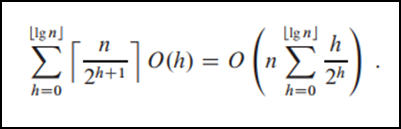

In [108]:
Image('Formula1.png', width = 400)

- $n$ = Cantidad de elementos.
- $h$ = Altura del árbol.
- $[n/2^(h+1)]$ = Cantidad de nodos en la altura h del montículo.

La expresión da como resultado la cantidad máxima de llamadas a la función - Heapify, tomando en cuenta las recursiones. Esta ecuación se resuelve comparando su resultado con el de la siguiente fórmula matemática: (Fuente de la fórmula: Introduction to Algorithms, Third Edition (p1148 - cap.6) / Fuente del procedimiento: Introduction to Algorithms, Third Edition (p159 - cap.6))

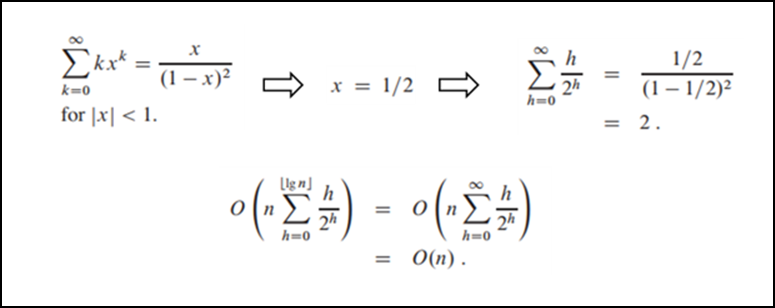

In [109]:
Image('Formula2.png', width = 400)

Algunas cosas a tomar en cuenta en el procedimiento:
- $x = 1/2$, puesto a que así las 2 sumatorias funcionan con el mismo término para la variable $(h/2^h)$.
- El resultado de la ecuación da $O(2n)$, pero al eliminar el coeficiente resulta en $O(n)$.

De esta forma se puede concluir que el tiempo de ejecución de Build-Heap es de $O(n).

---

###Tiempo de Ejecución de HeapSort:

Para calcular el tiempo de ejecución del HeapSort se deben tomar en cuenta las operaciones separadas que realiza la función:

- Primero que nada opera la función Build-Heap una vez, esto lo hace en función de transformar el arreglo en un montículo. El tiempo de ejecución de esta parte del algoritmo es de $O(n)$.
- Luego, comienza a operar el ciclo for, el cual realiza 3 operaciones de forma iterativa:
  - "Swap": Se intercambia el nodo raíz con el "último nodo" del arreglo (Último nodo no ordenado). Dado a que el montículo es un Max-Heap, el nodo raíz es el número mayor de la secuencia y debe ir al final.
  - "Disminuir": Se reduce en 1 el tamaño del montículo al momento de llamar a Heapify. De esta forma, se deja al número mayor ya ordenado en el arreglo.
  - Heapify: Esta función se encarga de mover a un nivel adecuado al nuevo nodo raíz. El resultado terminará dejando al siguiente número mayor como nodo raíz. Se asume que la función Heapify es correcta, y que realiza un máximo de O(log n) comparaciones, ya que hace una comparación por nivel.
  
 Analizando más a fondo la operación del loop, "Swap" es una operación constante, "Disminuir" es una asignación y sólo Heapify tendría un tiempo de ejecución a considerar de $O(log(n))$ en su peor caso. La complejidad de lo que está dentro del loop es de $O(log(n))$.

Sin embargo, si se toma en cuenta que el ciclo opera desde $n-1$ hasta $0$, recorriendo todas las posiciones del arreglo, se realizarían $O(log(n))$ operaciones un total de $n$ veces o expresado de otra forma, $O(n*log(n))$, la complejidad temporal del algoritmo de ordenamiento.

---

##5. Experimentos:

Para complementar el análisis hecho, se presentarán una serie de gráficos que experimentan con las características del algoritmo de ordenamiento:

---
###Comparación entre HeapSort, MergeSort e InsertionSort:
El principal experimento a mostrar es la comparación de algoritmos de ordenamiento. En este caso, se utilizará el método de InsertionSort ordenar arreglos con números aleatorios que tengan entre 25 y 500 elementos.

A continuación se presenta el código del InsertionSort a utilizar:


In [115]:
#Función Insertion Sort
def insertionSort (a, comp, verbose):
  for i in range (1, len(a)):
    #Definir Dato Clave o Pivote.
    key = a[i]
    #Ciclo para Encontrar la Posición del Dato Clave.
    for k in range (i-1, -1, -1):
      #Contador de Comparaciones.
      comp += 1
      #Condición que Verifica si el número Clave está en su posición correcta.
      if a[k] < key:
        break
      #Intercambiar de posición los números comparados.
      a[k+1] = a[k]
      a[k] = key
  return a, comp #Devolver el Arreglo Ordenado y el Número de Comparaciones realizadas.

A continuación se presenta el código del MergeSort a utilizar:

In [117]:
#Función Merge.
def Merge(A,p,q,r,verbose):
    #Definir Sub-Arreglos
    Left = []
    Right = []

    #Definir Tamaño
    sizeL = q - p + 1
    sizeR = r - q

    #Llenar Sub-arreglos
    for i in range (0, sizeL):
      Left.append(A[p+i])
    for j in range (0, sizeR):
      Right.append(A[q+1+j])

    #Definir Variables
    i = 0
    j = 0
    k = p
    
    #Ciclo de Comparaciones entre Sub-arreglos.
    while (i < len(Left) and j < len(Right)):
        if (Left[i] <= Right[j]):
            A[k] = Left[i]
            i += 1
        else:
            A[k] = Right[j]
            j += 1
        k += 1
    
    #Agregar el resto del arreglo.
    while (i < len(Left)):
        A[k] = Left[i]
        i += 1
        k += 1

    while (j < len(Right)):
        A[k] = Right[j]
        j += 1
        k += 1

#Algoritmo MergeSort.
def MergeSort(A, p, r, verbose):
   if p==r: 
     return #Si la secuencia sólo tiene un elemento, retornar.
   #Calcular índice intermedio.
   q = int((p+r)/2) 
   MergeSort(A,p,q,verbose) #Ordenar la parte IZQUIERDA del arreglo.
   MergeSort(A,q+1,r,verbose) #Ordenar la parte DERECHA del arreglo.
   Merge(A,p,q,r,verbose) #Ordenar y Combinar los sub-arreglos IZQUIERDA Y DERECHA.

Código para la Graficación:

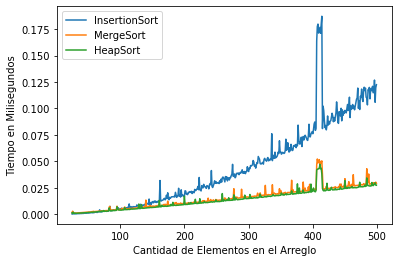

In [118]:
import matplotlib.pyplot as plt
from math import log2
import random
import datetime
from timeit import repeat

x=[]; y=[]
x1=[]; y1=[]
x2=[]; y2=[]

for n in range(25,500):

  a = random.sample(range(1, 500), n)

  num = 0
  MergeSort(data, 0, len(data)-1, verbose = False)
  verbose = False
  #La función repeat ejecuta 20 veces los algoritmos de ordenamiento con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a},{num},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{num},{len(a)-1},{verbose})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({a},{verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  x1.append(n)
  y1.append(t2)
  x2.append(n)
  y2.append(t3)


plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)

plt.legend(["InsertionSort","MergeSort","HeapSort"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()